In [43]:
import warnings
warnings.filterwarnings("ignore")
import boolean2 as b2
import matplotlib.pyplot as plt
import string_model_builder_3 as builder
from numpy.ma import masked_equal
from matplotlib.colors import ListedColormap

In [141]:
# model helper functions
# initialise any loose nodes
def missing( node_name ):
    return True

def run_model(definition, runs=1, steps=15, mode='sync'): # returns array of models of length runs
    
    models = []
    for i in range(runs):
        # run model under settings
        model = b2.Model(text=definition, mode=mode)
        model.initialize( missing=missing ) # initialise any loose nodes to true
        model.iterate(steps=steps)
        models.append(model)
    return models
    
def print_model(model): # print node states
    for node in model.data:
        print node, model.data[node]

In [113]:
def plot_model(model, nodes=None, w=10, h=32): # plot node states 
    
    # get data from model
    data = []
    labels = sorted(model.data.keys()) if not nodes else nodes # sort alphabetically, or a list of ordered nodes
    for label in labels:
        data.append(model.data[label])
        
    # plot figure
    cmap=plt.cm.get_cmap('gray') # off (0) = black, on (1) = white
    plt.yticks(range(0, len(labels)), labels)
    plt.imshow(data, cmap=cmap)
    plt.gcf().set_size_inches(w, h)

NUTF2 [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
ATP6V1D [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
CD1D [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
ATP6V1F [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
ATP6V1A [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
KLRD1 [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
HLA-C [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
HLA-B [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
CHMP4B [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
ESCRT_complexes [True, True, True, False, True, False, True, True, 

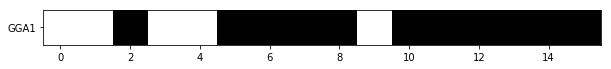

In [142]:
plot_model(models[0], nodes = ['GGA1'])
print_model(models[0])

In [116]:
definition = builder.string2definition('string_model_3_definition.txt') 
definition = builder.add_mtb2definition(definition, mtb_edgelist='mtb-edgelist.csv', initial_value=True)
models = run_model(definition)
# plot_model(model)
models[0].data

added: ['SapM', 'esxH_esxG', 'ndkA', 'esxA', 'PtpA', 'PPE2']


{'AP1B1': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 'ASPSCR1': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 'ATP6V1A': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 'ATP6V1B2': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 'ATP6V1D': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 'ATP6V1E1': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 'ATP6V1F': [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 'ATP6V1G1': [True,


In [118]:
models = run_model(definition,runs=3)
models

In [136]:
class DummyModel: # dummy model with data attribute
    def __init__(self, data):
        self.data = data

In [132]:
model = ([])
model.data

[]

In [139]:
class DummyModel: # dummy model with data attribute
    def __init__(self, data):
        self.data = data
        
def plot_average(models, nodes = None, w=10, h=32):


    # collect models into average (from booleannet docs)
    coll = b2.util.Collector()
    for model in models:
        coll.collect(states = model.states, nodes=model.nodes)
    avgs = coll.get_averages()   
    
    # plot average model
    avg_model = DummyModel(avgs) # so it can be passed to plot_model plain
    plot_model(avg_model, nodes=nodes, w=w, h=h)

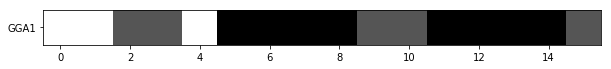

In [138]:
plot_average(models, nodes = ['GGA1'])

In [13]:
# comment relevent lines
new_definition = definition.split('\n')
for i, line in enumerate(new_definition):
    if line.startswith('VCP'):
#         print '#'+line # comment initialisation and rule
        new_definition[i] = '#'+line
        continue
new_definition.insert(1, 'VCP' + ' = False #knockout') # make off
print '\n'.join(new_definition)

#initial conditions
VCP = False #knockout
AP1B1 = True
ASPSCR1 = True
ATP6V1A = True
ATP6V1B2 = True
ATP6V1D = True
ATP6V1E1 = True
ATP6V1F = True
ATP6V1G1 = True
ATP6V1H = True
B2M = True
CALR = True
CD1B = True
CD1D = True
CD8A = True
CHMP2A = True
CHMP2B = True
CHMP3 = True
CHMP4B = True
CLVS2 = True
DERL1 = True
GGA1 = True
HGS = True
HIP1R = True
HLA-A = True
HLA-B = True
HLA-C = True
HLA-E = True
HLA-G = True
KLRC1 = True
KLRD1 = True
KPNA1 = True
KPNA2 = True
KPNB1 = True
NSFL1C = True
NUTF2 = True
RAB5A = True
RAB7A = True
RAN = True
STAM = True
TSG101 = True
UBXN7 = True
UFD1L = True
#VCP = True
VPS33B = True
XPO1 = True
XPO5 = True

#rules
NUTF2 *= KPNA2 or KPNB1 or RAN
ATP6V1D *= ATP6V1G1 or ATP6V1B2 or ATP6V1E1 or ATP6V1H or ATP6V1F or ATP6V1A
CD1D *= CD1B or B2M
ATP6V1F *= ATP6V1D or ATP6V1E1 or ATP6V1A or ATP6V1B2 or UBXN7 or ATP6V1H or ATP6V1G1
ATP6V1A *= ATP6V1D or ATP6V1E1 or ATP6V1G1 or ATP6V1F or ATP6V1H or ATP6V1B2
KLRD1 *= HLA-E or HLA-A or B2M or KLRC1
HLA-C *= CA

In [16]:
def knockout(definition, knockouts=[]):
    assert isinstance(knockouts, list), "takes list"
    new_definition = definition.split('\n')
    for knockout in knockouts:
        for i, line in enumerate(new_definition):
            if line.startswith(knockout):
                new_definition[i] = '#'+line # comment initialisation and rule
                continue
        new_definition.insert(1,knockout + ' = False #knockout') # make off
    return '\n'.join(new_definition)
        
        
        

#initial conditions
STAM = False #knockout
VCP = False #knockout
AP1B1 = True
ASPSCR1 = True
ATP6V1A = True
ATP6V1B2 = True
ATP6V1D = True
ATP6V1E1 = True
ATP6V1F = True
ATP6V1G1 = True
ATP6V1H = True
B2M = True
CALR = True
CD1B = True
CD1D = True
CD8A = True
CHMP2A = True
CHMP2B = True
CHMP3 = True
CHMP4B = True
CLVS2 = True
DERL1 = True
GGA1 = True
HGS = True
HIP1R = True
HLA-A = True
HLA-B = True
HLA-C = True
HLA-E = True
HLA-G = True
KLRC1 = True
KLRD1 = True
KPNA1 = True
KPNA2 = True
KPNB1 = True
NSFL1C = True
NUTF2 = True
RAB5A = True
RAB7A = True
RAN = True
#STAM = True
TSG101 = True
UBXN7 = True
UFD1L = True
#VCP = True
VPS33B = True
XPO1 = True
XPO5 = True

#rules
NUTF2 *= KPNA2 or KPNB1 or RAN
ATP6V1D *= ATP6V1G1 or ATP6V1B2 or ATP6V1E1 or ATP6V1H or ATP6V1F or ATP6V1A
CD1D *= CD1B or B2M
ATP6V1F *= ATP6V1D or ATP6V1E1 or ATP6V1A or ATP6V1B2 or UBXN7 or ATP6V1H or ATP6V1G1
ATP6V1A *= ATP6V1D or ATP6V1E1 or ATP6V1G1 or ATP6V1F or ATP6V1H or ATP6V1B2
KLRD1 *= HLA-E or HLA-A or 

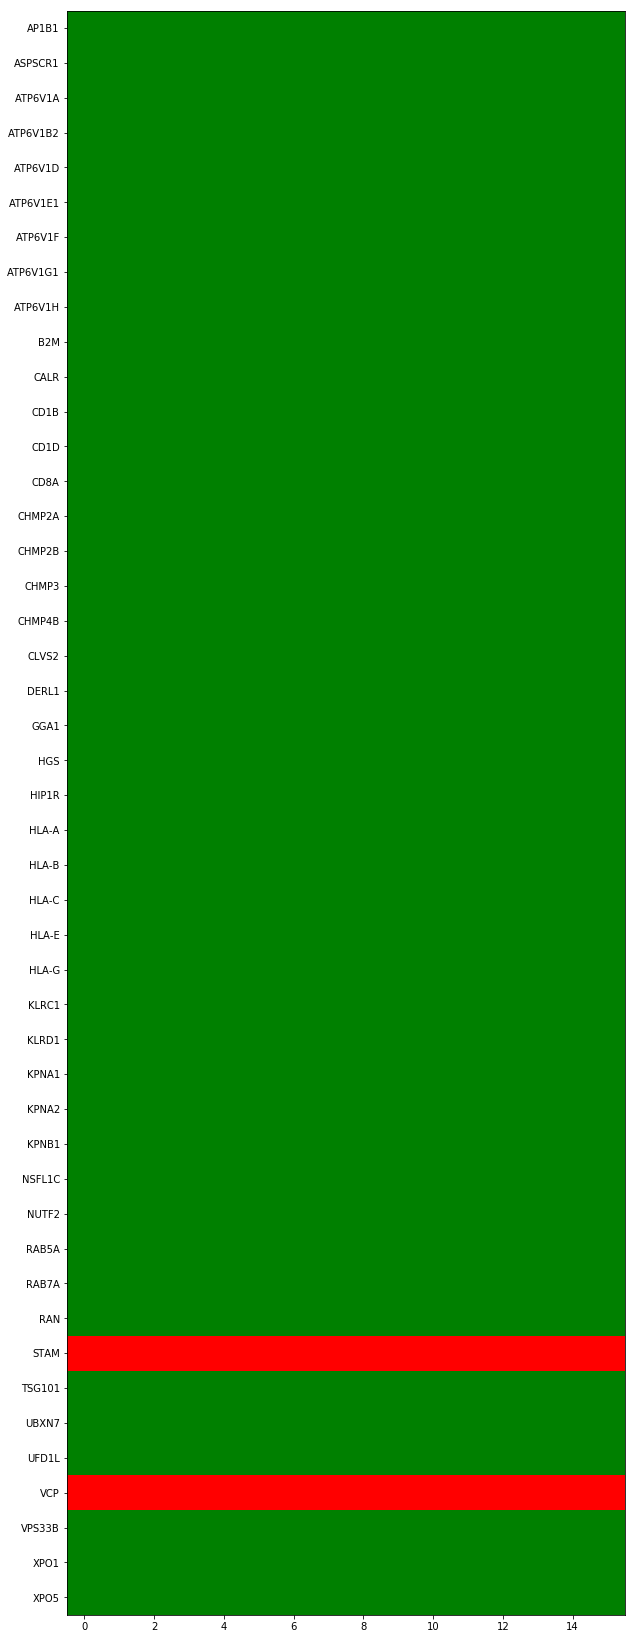

In [17]:
new_definition = knockout(definition, ['VCP', 'STAM'])
print new_definition
new_model = run_model(new_definition)
plot_model(new_model)

In [238]:
# comment relevent lines
for line in definition.split('\n'):
    if line.startswith('AP1B1' + ' ='):
        print 'AP1B1 = False' # comment initialisation and rule
        continue
    print line


#initial conditions
AP1B1 = False
ASPSCR1 = True
ATP6V1A = True
ATP6V1B2 = True
ATP6V1D = True
ATP6V1E1 = True
ATP6V1F = True
ATP6V1G1 = True
ATP6V1H = True
B2M = True
CALR = True
CD1B = True
CD1D = True
CD8A = True
CHMP2A = True
CHMP2B = True
CHMP3 = True
CHMP4B = True
CLVS2 = True
DERL1 = True
GGA1 = True
HGS = True
HIP1R = True
HLA-A = True
HLA-B = True
HLA-C = True
HLA-E = True
HLA-G = True
KLRC1 = True
KLRD1 = True
KPNA1 = True
KPNA2 = True
KPNB1 = True
NSFL1C = True
NUTF2 = True
RAB5A = True
RAB7A = True
RAN = True
STAM = True
TSG101 = True
UBXN7 = True
UFD1L = True
VCP = True
VPS33B = True
XPO1 = True
XPO5 = True

#rules
NUTF2 *= KPNA2 and KPNB1 and RAN
ATP6V1D *= ATP6V1G1 and ATP6V1B2 and ATP6V1E1 and ATP6V1H and ATP6V1F and ATP6V1A
CD1D *= CD1B and B2M
ATP6V1F *= ATP6V1D and ATP6V1E1 and ATP6V1A and ATP6V1B2 and UBXN7 and ATP6V1H and ATP6V1G1
ATP6V1A *= ATP6V1D and ATP6V1E1 and ATP6V1G1 and ATP6V1F and ATP6V1H and ATP6V1B2
KLRD1 *= HLA-E and HLA-A and B2M and KLRC1
HLA-C *= CA

In [20]:
def switch(definition, on=[], off=[]):
    assert isinstance(on, list), "takes list"
    assert isinstance(off, list), "takes list"
    
    new_definition = definition.split('\n')
    for node in on+off:
        for i, line in enumerate(new_definition):
            if line.startswith(node + ' ='): # initialisation NOT rule *=
                if node in on and node not in off:
                    new_definition[i] = node +' = True' # switch on
                if node in off and node not in on:
                    new_definition[i] = node +' = False' # switch off
                continue
    return '\n'.join(new_definition)

In [22]:
new_definition = switch(definition, off=['AP1B1', 'VCP'], on=['AP1B1', 'VCP'] )
print new_definition

#initial conditions
AP1B1 = True
ASPSCR1 = True
ATP6V1A = True
ATP6V1B2 = True
ATP6V1D = True
ATP6V1E1 = True
ATP6V1F = True
ATP6V1G1 = True
ATP6V1H = True
B2M = True
CALR = True
CD1B = True
CD1D = True
CD8A = True
CHMP2A = True
CHMP2B = True
CHMP3 = True
CHMP4B = True
CLVS2 = True
DERL1 = True
GGA1 = True
HGS = True
HIP1R = True
HLA-A = True
HLA-B = True
HLA-C = True
HLA-E = True
HLA-G = True
KLRC1 = True
KLRD1 = True
KPNA1 = True
KPNA2 = True
KPNB1 = True
NSFL1C = True
NUTF2 = True
RAB5A = True
RAB7A = True
RAN = True
STAM = True
TSG101 = True
UBXN7 = True
UFD1L = True
VCP = True
VPS33B = True
XPO1 = True
XPO5 = True

#rules
NUTF2 *= KPNA2 or KPNB1 or RAN
ATP6V1D *= ATP6V1G1 or ATP6V1B2 or ATP6V1E1 or ATP6V1H or ATP6V1F or ATP6V1A
CD1D *= CD1B or B2M
ATP6V1F *= ATP6V1D or ATP6V1E1 or ATP6V1A or ATP6V1B2 or UBXN7 or ATP6V1H or ATP6V1G1
ATP6V1A *= ATP6V1D or ATP6V1E1 or ATP6V1G1 or ATP6V1F or ATP6V1H or ATP6V1B2
KLRD1 *= HLA-E or HLA-A or B2M or KLRC1
HLA-C *= CALR or KPNA2 or CD8A or 

In [255]:
new_new_definition = switch(new_definition, on=['AP1B1'])
print new_new_definition

#initial conditions
AP1B1 = True
ASPSCR1 = True
ATP6V1A = True
ATP6V1B2 = True
ATP6V1D = True
ATP6V1E1 = True
ATP6V1F = True
ATP6V1G1 = True
ATP6V1H = True
B2M = True
CALR = True
CD1B = True
CD1D = True
CD8A = True
CHMP2A = True
CHMP2B = True
CHMP3 = True
CHMP4B = True
CLVS2 = True
DERL1 = True
GGA1 = True
HGS = True
HIP1R = True
HLA-A = True
HLA-B = True
HLA-C = True
HLA-E = True
HLA-G = True
KLRC1 = True
KLRD1 = True
KPNA1 = True
KPNA2 = True
KPNB1 = True
NSFL1C = True
NUTF2 = True
RAB5A = True
RAB7A = True
RAN = True
STAM = True
TSG101 = True
UBXN7 = True
UFD1L = True
VCP = True
VPS33B = True
XPO1 = True
XPO5 = True

#rules
NUTF2 *= KPNA2 and KPNB1 and RAN
ATP6V1D *= ATP6V1G1 and ATP6V1B2 and ATP6V1E1 and ATP6V1H and ATP6V1F and ATP6V1A
CD1D *= CD1B and B2M
ATP6V1F *= ATP6V1D and ATP6V1E1 and ATP6V1A and ATP6V1B2 and UBXN7 and ATP6V1H and ATP6V1G1
ATP6V1A *= ATP6V1D and ATP6V1E1 and ATP6V1G1 and ATP6V1F and ATP6V1H and ATP6V1B2
KLRD1 *= HLA-E and HLA-A and B2M and KLRC1
HLA-C *= CAL